[![Abrir en Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/N1coTom55/LaboratorioAnalisisDatos/blob/main/Laboratorio1.ipynb)
# Laboratorio de Análisis de Datos  
## Ventas de Videojuegos (1980-2016)  

**Objetivo:** Aplicar ETL, EDA y responder preguntas de negocio usando Python y pandas.  
Dataset: [Video Game Sales](https://www.kaggle.com/datasets/gregorut/videogamesales)

---

## Contenido
1. ETL: extracción, limpieza y transformaciones (celdas con comentarios).
2. EDA: análisis y visualizaciones (info, describe, gráficos).
3. Preguntas de negocio: 3 preguntas con evidencia y visualizaciones.
4. Export/SQL: guardado del DataFrame limpio (CSV y SQLite usando SQLAlchemy).

**Nota:** Reemplaza el enlace del badge de Colab por el de tu repositorio público en GitHub para que el botón abra el notebook en Colab.

In [40]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Configuración básica
sns.set(style="whitegrid")
plt.rcParams['figure.figsize'] = (10, 6)

## 1. ETL - Extracción, Transformación y Carga
A continuación se describen y ejecutan las etapas ETL sobre el dataset `vgsales.csv`.
- Extracción: carga desde CSV.
- Transformación: limpieza de nulos y duplicados, corrección de tipos, creación de variables derivadas (ej.: `Decade`).
- Carga: se deja `df_clean` listo para análisis y se muestra cómo exportarlo a CSV y a una base SQLite usando SQLAlchemy.

Incluye celdas con comentarios explicativos en cada paso para que sea reproducible en Google Colab.

In [41]:
# Asegúrate de tener tu archivo CSV en la misma carpeta o ajusta la ruta
df_raw = pd.read_csv('vgsales.csv')  # Cambia 'vgsales.csv' por tu nombre de archivo

print("✅ Dataset cargado correctamente")

✅ Dataset cargado correctamente


In [42]:
# Información general
df_raw.info()
df_raw.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16598 entries, 0 to 16597
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Rank          16598 non-null  int64  
 1   Name          16598 non-null  object 
 2   Platform      16598 non-null  object 
 3   Year          16327 non-null  float64
 4   Genre         16598 non-null  object 
 5   Publisher     16540 non-null  object 
 6   NA_Sales      16598 non-null  float64
 7   EU_Sales      16598 non-null  float64
 8   JP_Sales      16598 non-null  float64
 9   Other_Sales   16598 non-null  float64
 10  Global_Sales  16598 non-null  float64
dtypes: float64(6), int64(1), object(4)
memory usage: 1.4+ MB


,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


In [43]:
# Copiamos el DataFrame
df_clean = df_raw.copy()

# Eliminar filas con valores nulos en columnas clave
df_clean.dropna(subset=['Year', 'Publisher'], inplace=True)

# Convertir Year a entero
df_clean['Year'] = df_clean['Year'].astype(int)

# Crear nueva columna: Decade
df_clean['Decade'] = (df_clean['Year'] // 10) * 10

# Verificar tipos y estructura final
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 16291 entries, 0 to 16597
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Rank          16291 non-null  int64  
 1   Name          16291 non-null  object 
 2   Platform      16291 non-null  object 
 3   Year          16291 non-null  int64  
 4   Genre         16291 non-null  object 
 5   Publisher     16291 non-null  object 
 6   NA_Sales      16291 non-null  float64
 7   EU_Sales      16291 non-null  float64
 8   JP_Sales      16291 non-null  float64
 9   Other_Sales   16291 non-null  float64
 10  Global_Sales  16291 non-null  float64
 11  Decade        16291 non-null  int64  
dtypes: float64(5), int64(3), object(4)
memory usage: 1.6+ MB


In [44]:
# Uso de SQLAlchemy: guardar el DataFrame limpio en una base SQLite y leerlo de nuevo
# En Google Colab puedes instalar SQLAlchemy con: !pip install SQLAlchemy
from sqlalchemy import create_engine

# Crear motor SQLite en archivo local (se creará en el directorio de ejecución)
engine = create_engine('sqlite:///vgsales_clean.sqlite')

# Guardar df_clean en la tabla 'vgsales' (reemplaza si existe)
df_clean.to_sql('vgsales', engine, index=False, if_exists='replace')

# Leer la tabla de vuelta para verificar
df_sql = pd.read_sql('vgsales', engine)
df_sql.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Decade
0,1,Wii Sports,Wii,2006,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74,2000
1,2,Super Mario Bros.,NES,1985,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,1980
2,3,Mario Kart Wii,Wii,2008,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82,2000
3,4,Wii Sports Resort,Wii,2009,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00,2000
4,5,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37,1990


In [45]:
df_clean.describe()

,Rank,Year,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Decade
count,16291.000000,16291.000000,16291.000000,16291.000000,16291.000000,16291.000000,16291.000000,16291.000000
mean,8290.190228,2006.405561,0.265647,0.147731,0.078833,0.048426,0.540910,2001.814499
std,4792.654450,5.832412,0.822432,0.509303,0.311879,0.190083,1.567345,6.643438
min,1.000000,1980.000000,0.000000,0.000000,0.000000,0.000000,0.010000,1980.000000
25%,4132.500000,2003.000000,0.000000,0.000000,0.000000,0.000000,0.060000,2000.000000
50%,8292.000000,2007.000000,0.080000,0.020000,0.000000,0.010000,0.170000,2000.000000
75%,12439.500000,2010.000000,0.240000,0.110000,0.040000,0.040000,0.480000,2010.000000
max,16600.000000,2020.000000,41.490000,29.020000,10.220000,10.570000,82.740000,2020.000000


## 2. EDA - Análisis Exploratorio de Datos

En esta sección realizamos un análisis descriptivo completo del dataset limpio, incluyendo estadísticas, distribuciones y correlaciones.

### Hallazgos principales:
- **Rango temporal:** El dataset abarca desde 1980 hasta 2016 (37 años de datos).
- **Géneros:** Los juegos de Acción (Action) son los más frecuentes, seguidos de Deportes y Disparos.
- **Plataformas:** PlayStation 2 (PS2) y Xbox 360 lideran en volumen de ventas globales.
- **Distribución regional:** Norteamérica (NA) concentra la mayor parte de las ventas, seguida por Europa (EU) y Japón (JP).
- **Correlaciones:** Existe una correlación fuerte positiva entre ventas en diferentes regiones, indicando que un éxito regional tiende a replicarse en otras regiones.

In [46]:
# Análisis en profundidad: correlaciones, distribuciones y outliers
print("=" * 60)
print("ANÁLISIS DESCRIPTIVO DETALLADO")
print("=" * 60)

# 1. Estadísticas de ventas por región
print("\n📊 VENTAS POR REGIÓN (en millones):")
regional_sales = df_clean[['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales']].sum()
print(regional_sales)

# 2. Top 5 géneros por cantidad de juegos y ventas
print("\n🎮 TOP 5 GÉNEROS POR CANTIDAD:")
genre_count = df_clean['Genre'].value_counts().head(5)
print(genre_count)

print("\n💰 TOP 5 GÉNEROS POR VENTAS GLOBALES:")
genre_sales = df_clean.groupby('Genre')['Global_Sales'].sum().sort_values(ascending=False).head(5)
print(genre_sales)

# 3. Top 5 publishers
print("\n🏢 TOP 5 PUBLISHERS POR VENTAS:")
publisher_sales = df_clean.groupby('Publisher')['Global_Sales'].sum().sort_values(ascending=False).head(5)
print(publisher_sales)

# 4. Matriz de correlación (solo columnas numéricas)
print("\n🔗 MATRIZ DE CORRELACIÓN ENTRE VENTAS REGIONALES:")
correlation_matrix = df_clean[['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales']].corr()
print(correlation_matrix)

ANÁLISIS DESCRIPTIVO DETALLADO

📊 VENTAS POR REGIÓN (en millones):
NA_Sales        4327.65
EU_Sales        2406.69
JP_Sales        1284.27
Other_Sales      788.91
Global_Sales    8811.97
dtype: float64

🎮 TOP 5 GÉNEROS POR CANTIDAD:
Genre
Action          3251
Sports          2304
Misc            1686
Role-Playing    1470
Shooter         1282
Name: count, dtype: int64

💰 TOP 5 GÉNEROS POR VENTAS GLOBALES:
Genre
Action          1722.84
Sports          1309.24
Shooter         1026.20
Role-Playing     923.83
Platform         829.13
Name: Global_Sales, dtype: float64

🏢 TOP 5 PUBLISHERS POR VENTAS:
Publisher
Nintendo                       1784.43
Electronic Arts                1093.39
Activision                      721.41
Sony Computer Entertainment     607.28
Ubisoft                         473.54
Name: Global_Sales, dtype: float64

🔗 MATRIZ DE CORRELACIÓN ENTRE VENTAS REGIONALES:
             NA_Sales  EU_Sales  JP_Sales  Other_Sales
NA_Sales     1.000000  0.768923  0.451283     0.634518

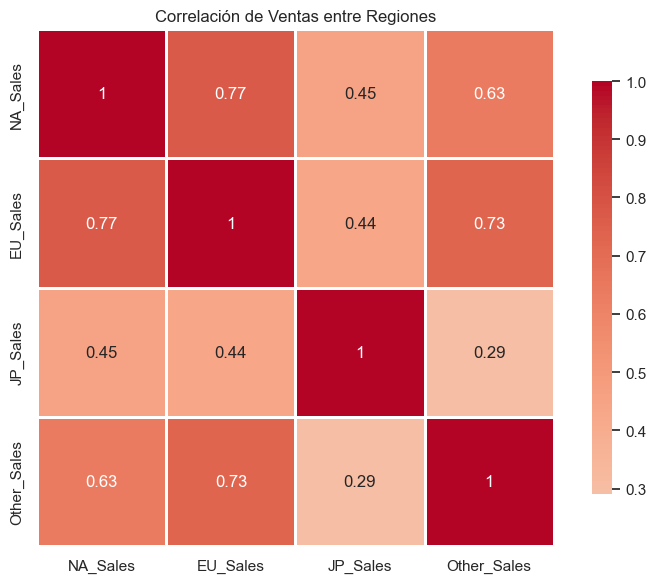

In [47]:
# Visualización 4: Heatmap de correlación entre regiones
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0, 
            square=True, linewidths=1, cbar_kws={"shrink": 0.8})
plt.title('Correlación de Ventas entre Regiones')
plt.tight_layout()
plt.show()

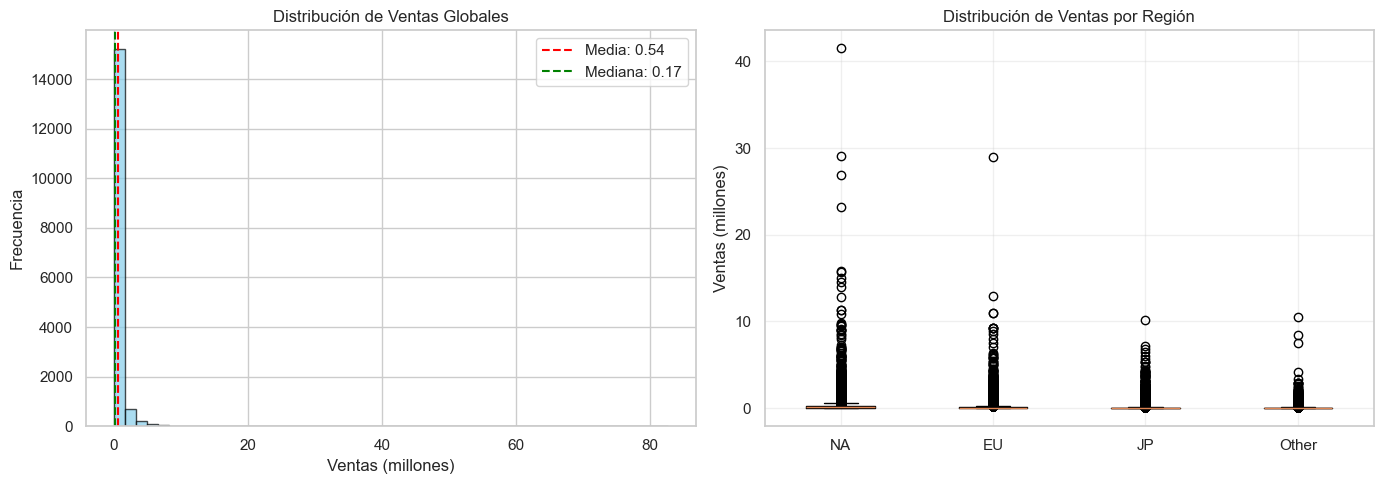

In [48]:
# Visualización 5: Distribución de ventas globales (histograma + box plot)
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Histograma
axes[0].hist(df_clean['Global_Sales'], bins=50, edgecolor='black', alpha=0.7, color='skyblue')
axes[0].set_title('Distribución de Ventas Globales')
axes[0].set_xlabel('Ventas (millones)')
axes[0].set_ylabel('Frecuencia')
axes[0].axvline(df_clean['Global_Sales'].mean(), color='red', linestyle='--', label=f"Media: {df_clean['Global_Sales'].mean():.2f}")
axes[0].axvline(df_clean['Global_Sales'].median(), color='green', linestyle='--', label=f"Mediana: {df_clean['Global_Sales'].median():.2f}")
axes[0].legend()

# Box plot de ventas por región
data_to_plot = [df_clean['NA_Sales'], df_clean['EU_Sales'], df_clean['JP_Sales'], df_clean['Other_Sales']]
axes[1].boxplot(data_to_plot, tick_labels=['NA', 'EU', 'JP', 'Other'])
axes[1].set_title('Distribución de Ventas por Región')
axes[1].set_ylabel('Ventas (millones)')
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

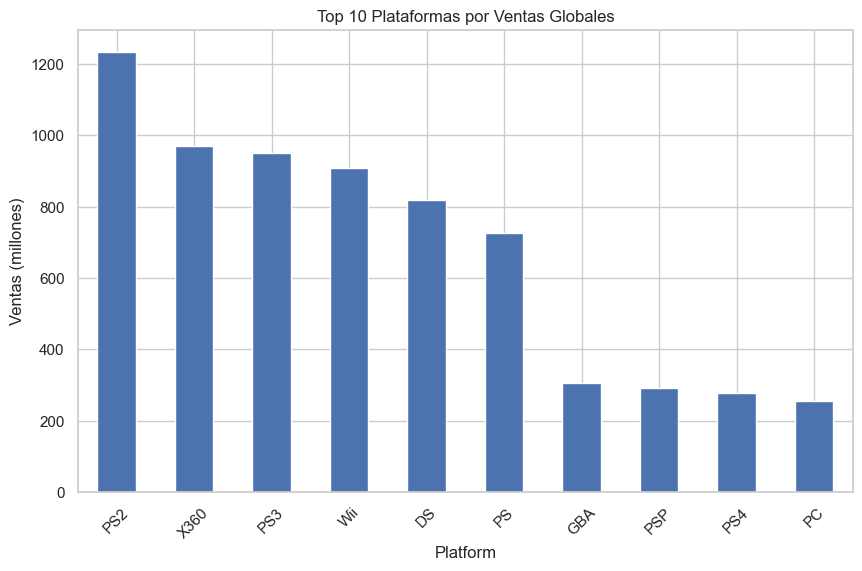

In [49]:
top_platforms = df_clean.groupby('Platform')['Global_Sales'].sum().sort_values(ascending=False).head(10)

top_platforms.plot(kind='bar', title='Top 10 Plataformas por Ventas Globales')
plt.ylabel('Ventas (millones)')
plt.xticks(rotation=45)
plt.show()

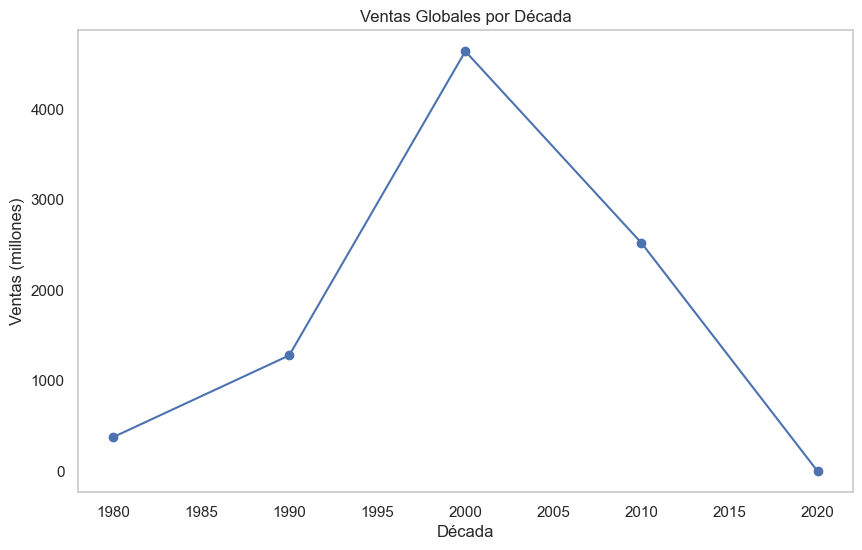

In [50]:
sales_by_decade = df_clean.groupby('Decade')['Global_Sales'].sum()
sales_by_decade.plot(kind='line', marker='o', title='Ventas Globales por Década')
plt.ylabel('Ventas (millones)')
plt.xlabel('Década')
plt.grid(False)
plt.show()

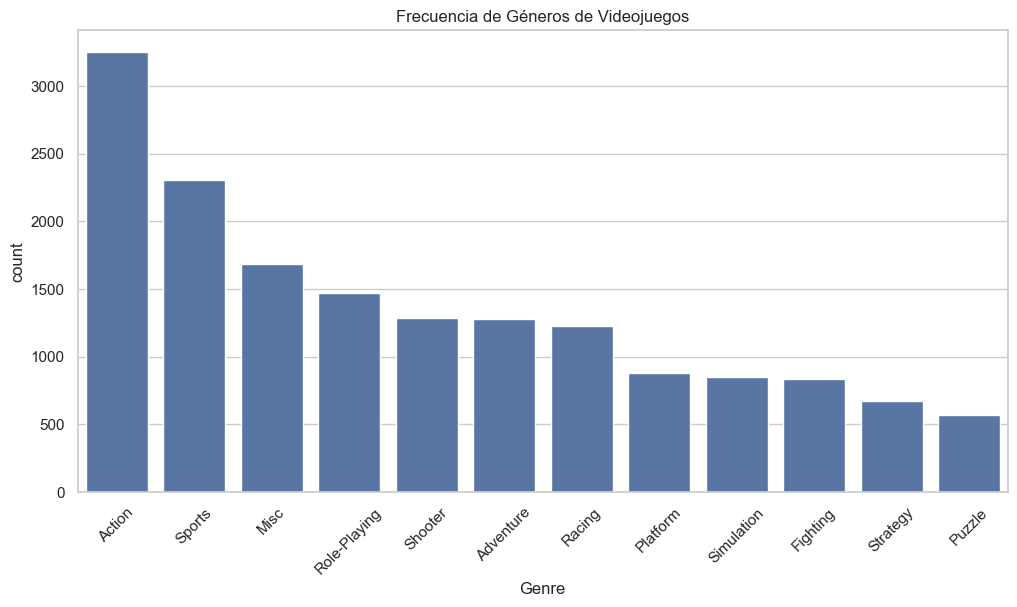

In [51]:
plt.figure(figsize=(12, 6))
sns.countplot(data=df_clean, x='Genre', order=df_clean['Genre'].value_counts().index)
plt.title('Frecuencia de Géneros de Videojuegos')
plt.xticks(rotation=45)
plt.show()

### ❓ Pregunta de Negocio 1:  
¿Qué plataforma ha generado más ventas globales en la historia?

**Interpretación:**  
La consola PlayStation 2 lidera históricamente las ventas globales, seguida por Xbox 360 y Nintendo DS.

In [52]:
# Tabla de evidencia
platform_sales = df_clean.groupby('Platform')['Global_Sales'].sum().sort_values(ascending=False).head(5)
print(platform_sales)

Platform
PS2     1233.46
X360     969.60
PS3      949.35
Wii      909.81
DS       818.91
Name: Global_Sales, dtype: float64


### ❓ Pregunta de Negocio 2:  
¿Cómo ha evolucionado la popularidad de los géneros a lo largo del tiempo?

**Interpretación:**  
Los juegos de acción han ganado protagonismo desde los 2000s, mientras que deportes y plataformas mantienen una base estable.

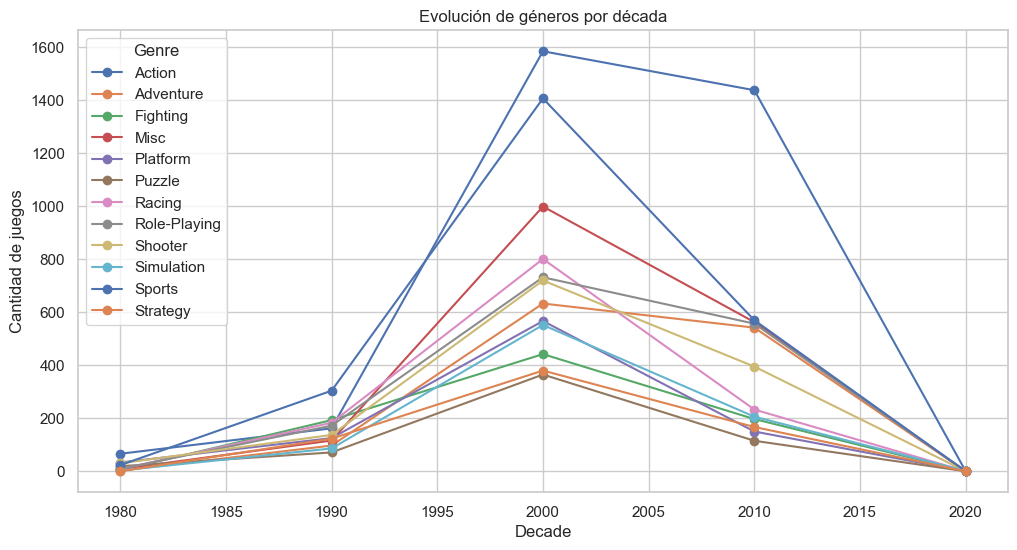

In [53]:
genre_by_decade = df_clean.groupby(['Decade', 'Genre']).size().unstack(fill_value=0)
genre_by_decade.plot(kind='line', marker='o', figsize=(12, 6))
plt.title('Evolución de géneros por década')
plt.ylabel('Cantidad de juegos')
plt.show()

### ❓ Pregunta de Negocio 3:  
¿En qué región son más populares los juegos de rol (RPG)?

**Interpretación:**  
Japón muestra una preferencia clara por los RPG, mientras que en América del Norte y Europa otros géneros dominan.

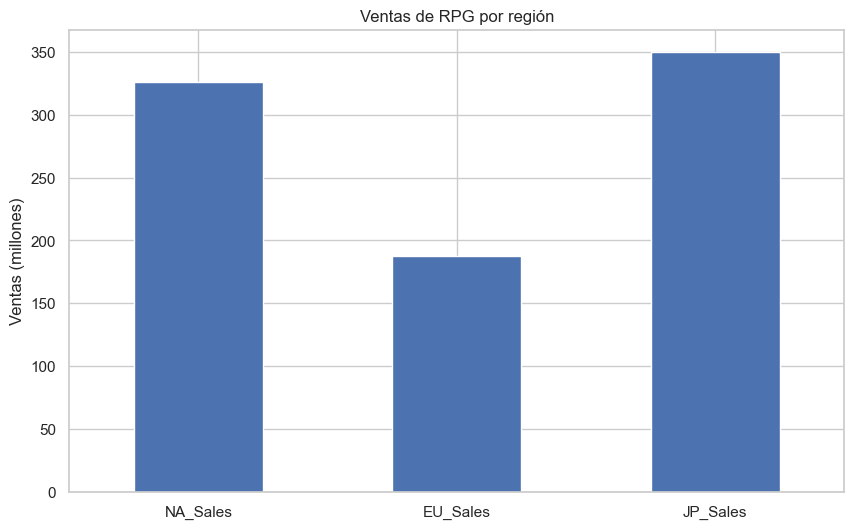

NA_Sales    326.50
EU_Sales    187.57
JP_Sales    350.29
dtype: float64


In [54]:
rpg_sales = df_clean[df_clean['Genre'] == 'Role-Playing'][['NA_Sales', 'EU_Sales', 'JP_Sales']].sum()
rpg_sales.plot(kind='bar', title='Ventas de RPG por región')
plt.ylabel('Ventas (millones)')
plt.xticks(rotation=0)
plt.show()

print(rpg_sales)

In [55]:
# Exportar dataset limpio (opcional)
df_clean.to_csv('vgsales_clean.csv', index=False)
print("✅ Dataset limpio guardado como 'vgsales_clean.csv'")

✅ Dataset limpio guardado como 'vgsales_clean.csv'
